$$c = S_0\mathcal N(d_1) - Ke^{-rT}\mathcal N(d_2)\\
d_{1,2} = \frac{1}{\sigma\sqrt{T}}\left( \log\left(\frac{S_0}{K}\right) + \left(r\pm\frac{1}{2}\sigma^2\right)T \right)\\
{\large\nu} = \frac{\partial c}{\partial \sigma} = S_0 \sqrt T \mathcal N'(d_1)>0$$

In [1]:
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as scs
import matplotlib.pyplot as plt
import sys
import time

In [2]:
# data available at Tonghuashun
# data retrived at 2018-06-19
# 上证50ETF购9月
raw_data = pd.read_csv('rrawData.csv')

In [3]:
raw_data

,K,buyPrice,sellPrice,Open,currentPrice,primiumRate,impVola,High,Low
0,3.60,0.0041,0.0047,0.0038,0.0044,37.99%,0.3038,0.0048,0.0038
1,3.50,0.0049,0.0055,0.0044,0.0049,34.18%,0.2863,0.0054,0.0041
2,3.40,0.0057,0.0062,0.0051,0.0058,30.39%,0.2704,0.0065,0.0051
3,3.30,0.0074,0.0076,0.0066,0.0076,26.63%,0.2579,0.0082,0.0063
4,3.20,0.0098,0.0101,0.0085,0.0099,22.89%,0.2434,0.0109,0.0083
5,3.10,0.0144,0.0153,0.0131,0.0146,19.24%,0.2340,0.0158,0.0123
6,3.00,0.0216,0.0218,0.0205,0.0217,15.69%,0.2238,0.0238,0.0195
7,2.95,0.0274,0.0288,0.0267,0.0285,14.03%,0.2240,0.0291,0.0240
8,2.90,0.0352,0.0363,0.0351,0.0352,12.37%,0.2197,0.0375,0.0304
9,2.85,0.0440,0.0456,0.0465,0.0455,10.85%,0.2198,0.0490,0.0382


In [4]:
# calculate T
end_date = dt.date(2018,9,26)
start_date = dt.date(2018,6,19)
T = start_date - end_date
T = -T.days/365
# S_0, the close price of 上证50ETF, available at Tonghuashun
S_0 = 2.612
# r, the interest rate of 3-year bond, available at
# http://www.cmbchina.com/CmbWebPubInfo/SaveBondInfo.aspx?chnl=savebond&keyword=&page=6
r = 0.04
print('T (in years):\t\t',T)
print('S_0 (initial price):\t',S_0)
print('r (interest rate):\t',r)

T (in years):		 0.27123287671232876
S_0 (initial price):	 2.612
r (interest rate):	 0.04


In [5]:
call_price = raw_data['currentPrice']
K = raw_data['K']

In [6]:
def get_c(t,S_t,T,K,r,sigma):
    d_1 = (math.log(S_t/K) + (r+0.5*sigma**2)*(T-t))/(sigma*math.sqrt(T-t))
    d_2 = (math.log(S_t/K) + (r-0.5*sigma**2)*(T-t))/(sigma*math.sqrt(T-t))
    c = S_t*scs.norm.cdf(d_1)-K*math.exp(-r*T)*scs.norm.cdf(d_2)
    return c

In [7]:
imp_vol = []
delta = 0.000001
for i in range(len(raw_data)):
    sigma_up = 4.0001
    sigma_down = 0.0001
    while True:
        sigma_mid = (sigma_up + sigma_down)/2
        c_mid = c_down = get_c(0,S_0,T,K[i],r,sigma_mid)
        c_price = call_price[i]
        if c_price <= c_mid:
            sigma_up = sigma_mid
        else:
            sigma_down = sigma_mid
        d = c_mid - c_price
        if abs(d)<delta:
            imp_vol.append(sigma_mid)
            print('impVol at K=:'+ str(K[i]) + '\t' ,sigma_mid)
            break

impVol at K=:3.6	 0.3020866943359375
impVol at K=:3.5	 0.28458486328125
impVol at K=:3.4	 0.26859365234375
impVol at K=:3.3	 0.255989892578125
impVol at K=:3.2	 0.2413567138671875
impVol at K=:3.1	 0.231789453125
impVol at K=:3.0	 0.2213982177734375
impVol at K=:2.95	 0.22137914428710936
impVol at K=:2.9	 0.21685491333007811
impVol at K=:2.85	 0.21674047241210936
impVol at K=:2.8	 0.21471105346679686
impVol at K=:2.75	 0.21477208862304686
impVol at K=:2.7	 0.21327672729492186
impVol at K=:2.65	 0.21281514892578124
impVol at K=:2.6	 0.215279443359375
impVol at K=:2.55	 0.21817861328125
impVol at K=:2.5	 0.22084508666992186
impVol at K=:2.45	 0.21059880981445311
impVol at K=:2.4	 0.20887838134765624


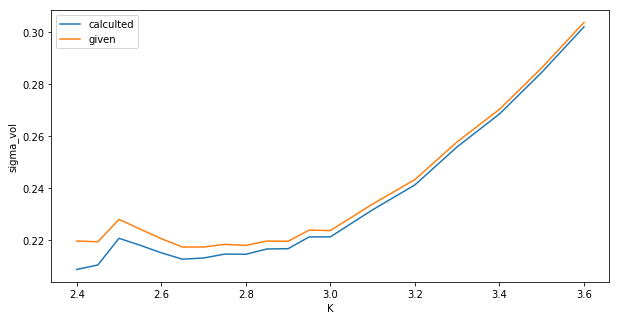

In [8]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax  = fig.add_subplot(111)
A = ax.plot(K,imp_vol,label='calculted')
B = ax.plot(K,raw_data['impVola'],label='given')
ax.legend()
ax.set_xlabel('K')
ax.set_ylabel('sigma_vol')

***